In [4]:
import random, os, sys
from datetime import datetime
import pandas as pd
import csv
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Importing the Dataset

In [6]:
from google.colab import files
uploaded = files.upload()

Saving olympics_medals_country_wise 2.csv to olympics_medals_country_wise 2.csv


In [8]:
import io
df = pd.read_csv(io.StringIO(uploaded['olympics_medals_country_wise 2.csv'].decode('utf-8')))

Initial view of the data

In [9]:
df.head()

,countries,ioc_code,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participation,total_gold,total_silver,total_bronze,total_total
0,Afghanistan,(AFG),15,0,0,2,2,0,0,0,0,0,15,0,0,2,2
1,Algeria,(ALG),14,5,4,8,17,3,0,0,0,0,17,5,4,8,17
2,Argentina,(ARG),25,21,26,30,77,20,0,0,0,0,45,21,26,30,77
3,Armenia,(ARM),7,2,8,8,18,8,0,0,0,0,15,2,8,8,18
4,Australasia,(ANZ),2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   countries              156 non-null    object
 1   ioc_code               156 non-null    object
 2   summer_participations  156 non-null    int64 
 3   summer_gold            156 non-null    object
 4   summer_silver          156 non-null    int64 
 5   summer_bronze          156 non-null    int64 
 6   summer_total           156 non-null    object
 7   winter_participations  156 non-null    int64 
 8   winter_gold            156 non-null    int64 
 9   winter_silver          156 non-null    int64 
 10  winter_bronze          156 non-null    int64 
 11  winter_total           156 non-null    int64 
 12  total_participation    156 non-null    int64 
 13  total_gold             156 non-null    object
 14  total_silver           156 non-null    int64 
 15  total_bronze           

Replacing the object datatypes to int checking the distinct entries

In [11]:
df['summer_total'] = df['summer_total'].str.replace(',','').astype(int)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   countries              156 non-null    object
 1   ioc_code               156 non-null    object
 2   summer_participations  156 non-null    int64 
 3   summer_gold            156 non-null    object
 4   summer_silver          156 non-null    int64 
 5   summer_bronze          156 non-null    int64 
 6   summer_total           156 non-null    int64 
 7   winter_participations  156 non-null    int64 
 8   winter_gold            156 non-null    int64 
 9   winter_silver          156 non-null    int64 
 10  winter_bronze          156 non-null    int64 
 11  winter_total           156 non-null    int64 
 12  total_participation    156 non-null    int64 
 13  total_gold             156 non-null    object
 14  total_silver           156 non-null    int64 
 15  total_bronze           

In [13]:
df['total_total '] = df['total_total '].str.replace(',','').astype(int)

In [17]:
df['summer_gold'] = df['summer_gold'].str.replace(',','').astype(int)

In [18]:
df['total_gold'] = df['total_gold'].str.replace(',','').astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   countries              156 non-null    object
 1   ioc_code               156 non-null    object
 2   summer_participations  156 non-null    int64 
 3   summer_gold            156 non-null    int64 
 4   summer_silver          156 non-null    int64 
 5   summer_bronze          156 non-null    int64 
 6   summer_total           156 non-null    int64 
 7   winter_participations  156 non-null    int64 
 8   winter_gold            156 non-null    int64 
 9   winter_silver          156 non-null    int64 
 10  winter_bronze          156 non-null    int64 
 11  winter_total           156 non-null    int64 
 12  total_participation    156 non-null    int64 
 13  total_gold             156 non-null    int64 
 14  total_silver           156 non-null    int64 
 15  total_bronze           

Q) What are the data types?

We can see from the above cells that our dataset has 15 numeric variables and 2 categorical variable 

Q) Checking for missing values

In [20]:
df.isnull().sum()

countries                0
ioc_code                 0
summer_participations    0
summer_gold              0
summer_silver            0
summer_bronze            0
summer_total             0
winter_participations    0
winter_gold              0
winter_silver            0
winter_bronze            0
winter_total             0
total_participation      0
total_gold               0
total_silver             0
total_bronze             0
total_total              0
dtype: int64

**Q.** Are there missing values?

As seen in the above cell , no missing values are present.Let us visualize this with a heatmap, just to be sure.

In [1]:
#sns.heatmap(df.isnull(), yticklabels=False,cmap='icefire_r')

What are the likely distributions of the numeric variables?


In [21]:
df.columns

Index(['countries ', 'ioc_code ', 'summer_participations', 'summer_gold',
       'summer_silver', 'summer_bronze', 'summer_total',
       'winter_participations', 'winter_gold', 'winter_silver',
       'winter_bronze', 'winter_total', 'total_participation', 'total_gold',
       'total_silver', 'total_bronze', 'total_total '],
      dtype='object')

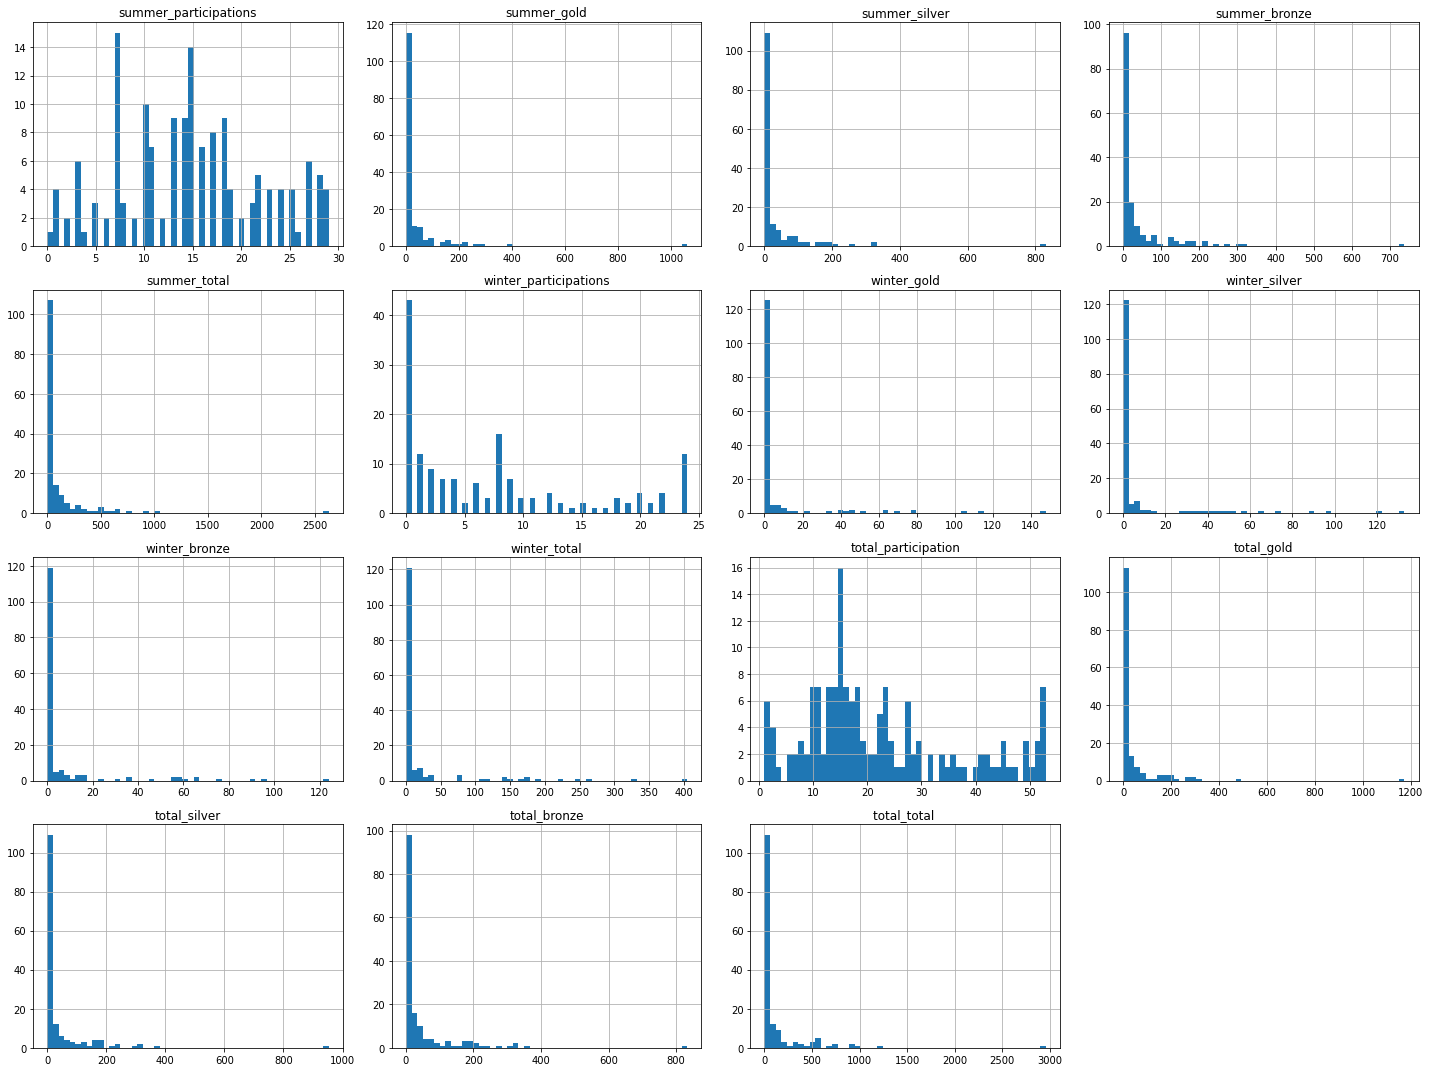

In [22]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()


Explanation Pending Rukho zaraaaaaaa.  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)



Firstly, we will check the correlation between the predictor and the target variable.

In [25]:
corr_data = df.corr()
corr_y = corr_data["total_total "]
corr_y.sort_values(ascending = False)

total_total              1.000000
total_silver             0.998988
total_gold               0.992970
total_bronze             0.990859
summer_total             0.988365
summer_silver            0.986761
summer_bronze            0.982878
summer_gold              0.976221
winter_silver            0.769819
winter_total             0.761356
winter_gold              0.753144
winter_bronze            0.742587
winter_participations    0.541945
total_participation      0.500373
summer_participations    0.363001
Name: total_total , dtype: float64

From the above correlation data we can come to the conclusion that above highest can be considered to be as features to predict a target varaiable.

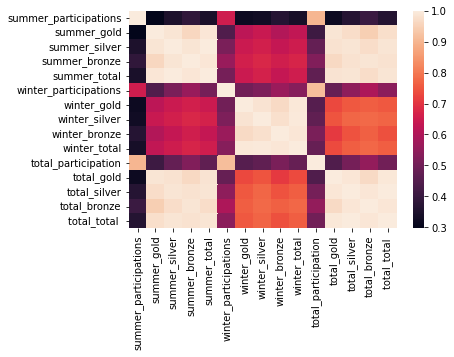

In [26]:
sns.heatmap(df.corr())

Method 2 Pearson correlation

In [149]:
corr_df = pd.DataFrame(columns=['r','p-value'])

for i in X:
    r, p =stats.pointbiserialr(y,X[i])
    corr_df.loc[i] = [round(r,3),p]

corr_df.sort_values(by='p-value', ascending= False)


,r,p-value
index,0.005,9.458095e-01
summer_participations,0.363,3.204156e-06
total_participation,0.500,2.905785e-11
winter_participations,0.542,2.748145e-13
winter_bronze,0.743,1.333513e-28
winter_gold,0.753,8.329147e-30
winter_total,0.761,8.728403e-31
winter_silver,0.770,7.746427e-32
summer_gold,0.976,3.663467e-104
summer_bronze,0.983,4.901401e-115


In the above illustration, we used point biserial rank. This is used when we are finding the correlation between a binary categorical variable and a continuous variable. More about this can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pointbiserialr.html))

Method 3 Using Linearity 

In [59]:
X = df.iloc[:,2:-1]

y = df.iloc[:,-1]

In [150]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_sc = sc.transform(X)
X_sc =pd.DataFrame(X_sc,index= X.index, columns= X.columns)
X_s = X_sc # backup used later
X_sc.head()

,index,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participation,total_gold,total_silver,total_bronze
0,-1.720983,0.044128,-0.342927,-0.405341,-0.431603,-0.392538,-0.928815,-0.338718,-0.350474,-0.370962,-0.355616,-0.502548,-0.362836,-0.417592,-0.444365
1,-1.698777,-0.090851,-0.293947,-0.358726,-0.359218,-0.336761,-0.547846,-0.338718,-0.350474,-0.370962,-0.355616,-0.358699,-0.320162,-0.378074,-0.382673
2,-1.676571,1.393918,-0.137209,-0.102344,-0.093807,-0.113652,1.610977,-0.338718,-0.350474,-0.370962,-0.355616,1.655181,-0.183606,-0.160729,-0.156470
3,-1.654365,-1.035705,-0.323335,-0.312111,-0.359218,-0.333042,0.087102,-0.338718,-0.350474,-0.370962,-0.355616,-0.502548,-0.345767,-0.338557,-0.382673
4,-1.632158,-1.710600,-0.313539,-0.358726,-0.395411,-0.355353,-0.928815,-0.338718,-0.350474,-0.370962,-0.355616,-1.437564,-0.337232,-0.378074,-0.413519


Apply VIF

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_sc.columns
    vif["VIF"] = [variance_inflation_factor(X_sc.values, i) for i in range(X_sc.shape[1])]
    vif = vif.sort_values(by = 'VIF', ascending=False)
    return(vif)
calc_vif(X_sc)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
1,summer_participations,inf
2,summer_gold,inf
3,summer_silver,inf
4,summer_bronze,inf
5,summer_total,inf
6,winter_participations,inf
7,winter_gold,inf
8,winter_silver,inf
9,winter_bronze,inf
10,winter_total,inf


In [152]:
def drop_large_vif(a):
    calc_vif(a)
    for i in range(len(a.columns)-1):
        col = calc_vif(a).iloc[0,0]
        val = calc_vif(a).iloc[0,1]
        if val > 10:
            a.drop(col,axis=1,inplace=True)
    return calc_vif(a)
    
drop_large_vif(X_sc)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
1,winter_participations,6.620407
3,total_participation,6.178814
2,winter_silver,2.460192
4,total_gold,2.354443
0,index,1.026343


The above 4 features can be considered useful for prediction.

Method **3** 
>   The final technique to be discussed is Mutual Information **MI.** 

>MI measures the dependency between the two variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [34]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X, y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

summer_total             2.225943
total_bronze             0.950264
total_gold               0.903583
summer_bronze            0.820504
total_silver             0.746442
summer_silver            0.644047
summer_gold              0.620676
winter_participations    0.254896
total_participation      0.210243
winter_silver            0.146511
summer_participations    0.134432
winter_gold              0.109775
winter_total             0.103601
winter_bronze            0.000000
dtype: float64

The above result show the important features in desceding order.
Let's plot the result.

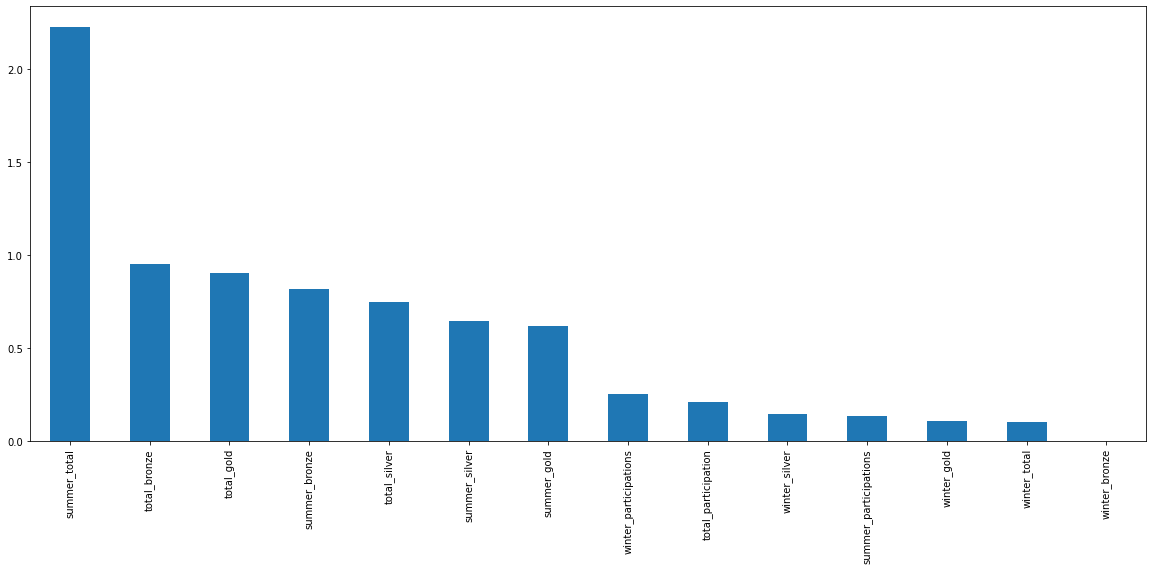

In [35]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Let us split the dataset into training and testing set.

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99 )

**Q. Do the training and test sets have the same data?**

> No. They are from the same distribution but not equal to each other.

**Q. Are the predictor variables independent of all the other predictor variables?**



> To find this, we need to find if there is any correlation between the features. 

> Let us plot a correlation heatmap to test this.



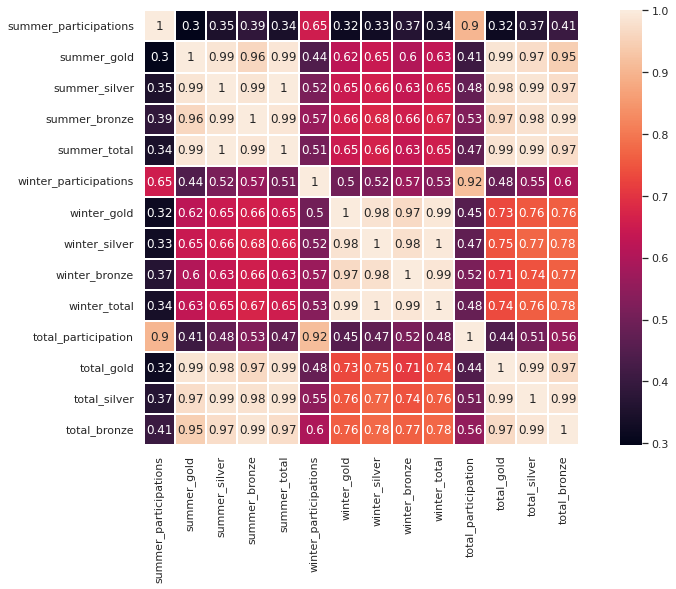

In [38]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(X.corr(), linewidths=1, annot = True, square =True , )



> The above figure shows that there is multicollinearity present. Thus some predictor variables are dependent on others.

We can learn more about multicollinearity from [here](https://towardsdatascience.com/how-to-identify-the-right-independent-variables-for-machine-learning-supervised-algorithms-439986562d32)



**Q. Which predictor variables are the most important?**



> For this question, we will use the **SelectKBest** package to find the top 4 important features.

> It uses mutual information (MI) that we have already calculated above to select the K best features.



In [39]:
from sklearn.feature_selection import SelectKBest

sel_four_cols = SelectKBest(mutual_info_classif, k=4)
sel_four_cols.fit(X, y)
X.columns[sel_four_cols.get_support()]

Index(['summer_total', 'total_gold', 'total_silver', 'total_bronze'], dtype='object')

**Q. Do the ranges of the predictor variables make sense?**

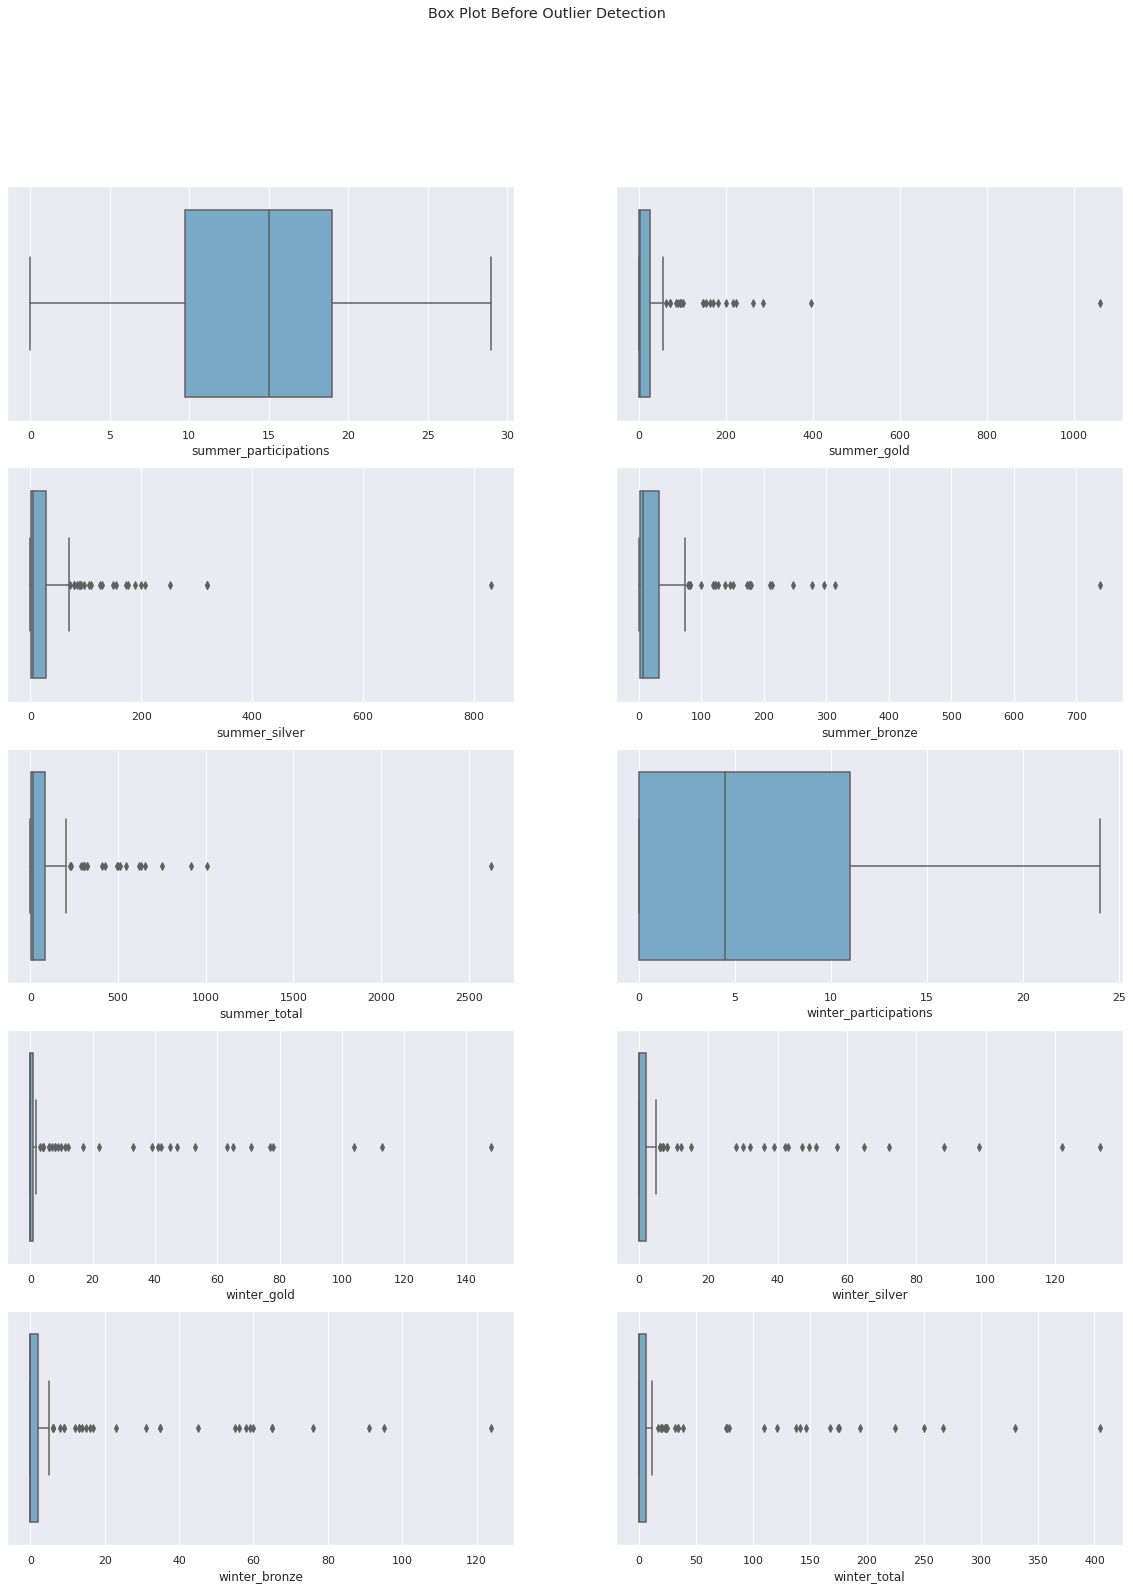

In [40]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot Before Outlier Detection')
k = 0
for i in range(0,5):
    for j in range(0,2):
        sns.boxplot(ax=axes[i,j], data=df, x=X.columns[k], palette="Blues")
        k=k+1

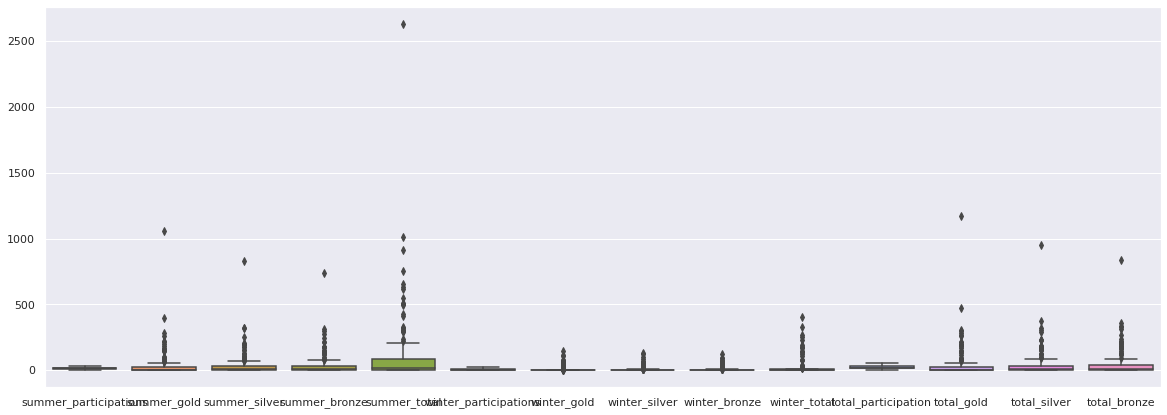

In [42]:
plt.figure(figsize=(20,7))
sns.boxplot(data=X)

**Q. What are the distributions of the predictor variables?**



> Let us visualize this through QQplots instead of histograms which was illustrated earlier.



<Figure size 576x360 with 0 Axes>

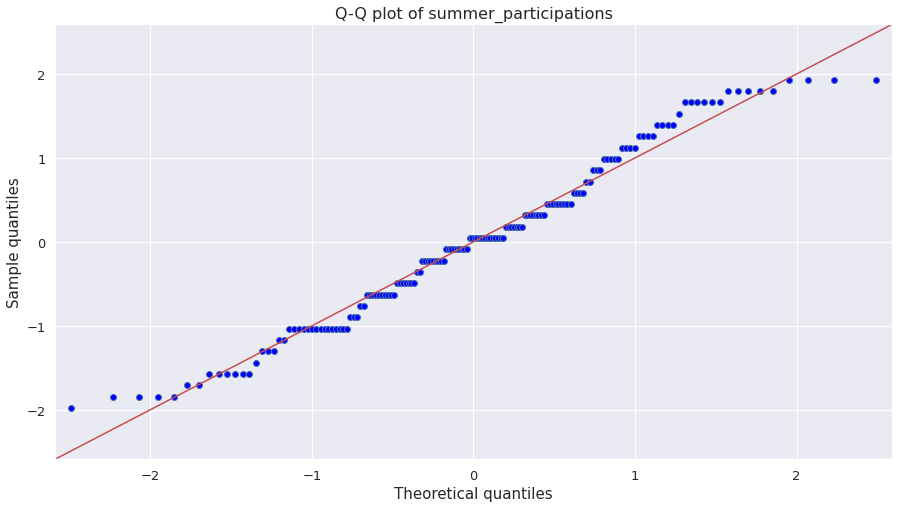

<Figure size 576x360 with 0 Axes>

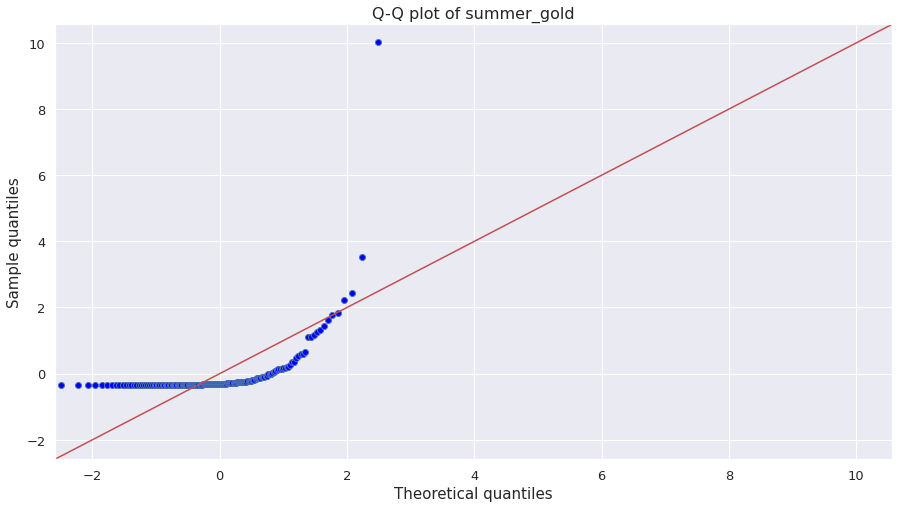

<Figure size 576x360 with 0 Axes>

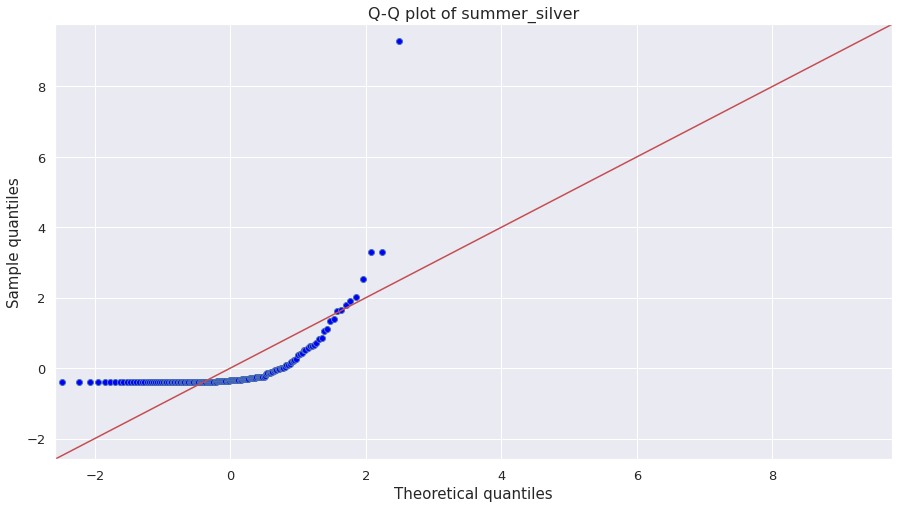

<Figure size 576x360 with 0 Axes>

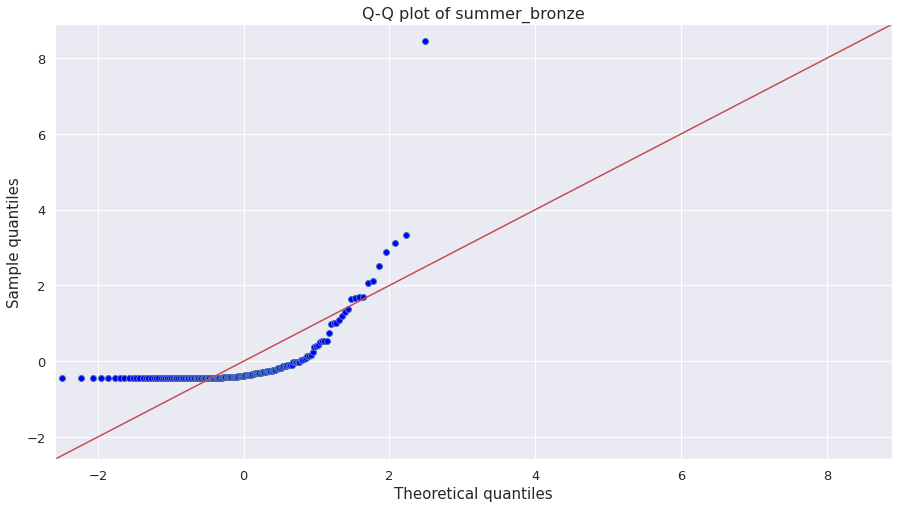

<Figure size 576x360 with 0 Axes>

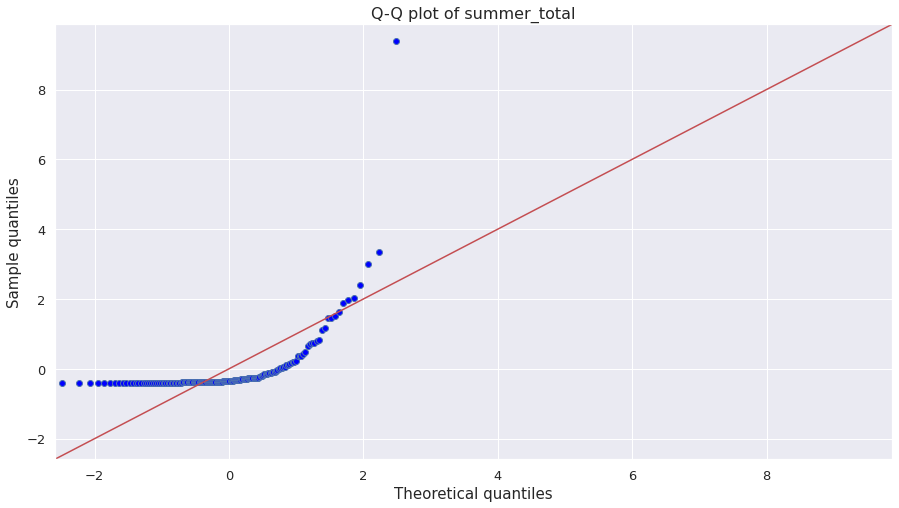

<Figure size 576x360 with 0 Axes>

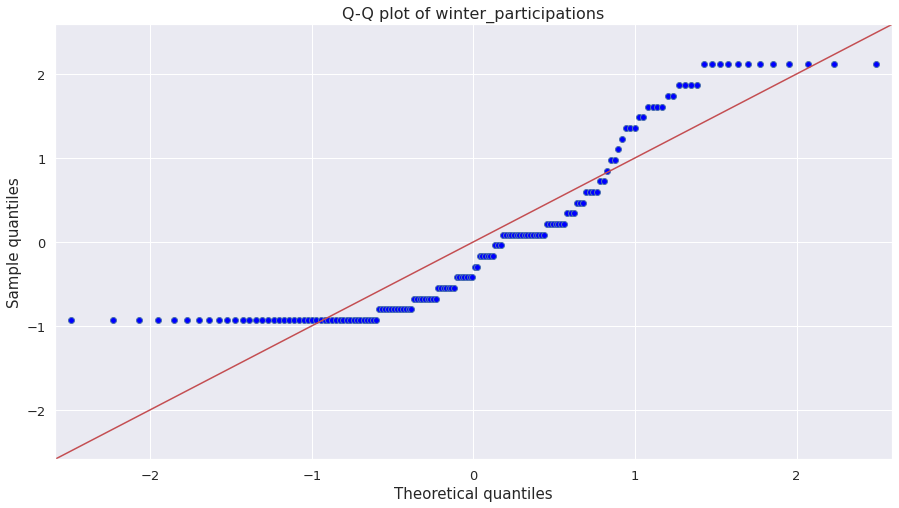

<Figure size 576x360 with 0 Axes>

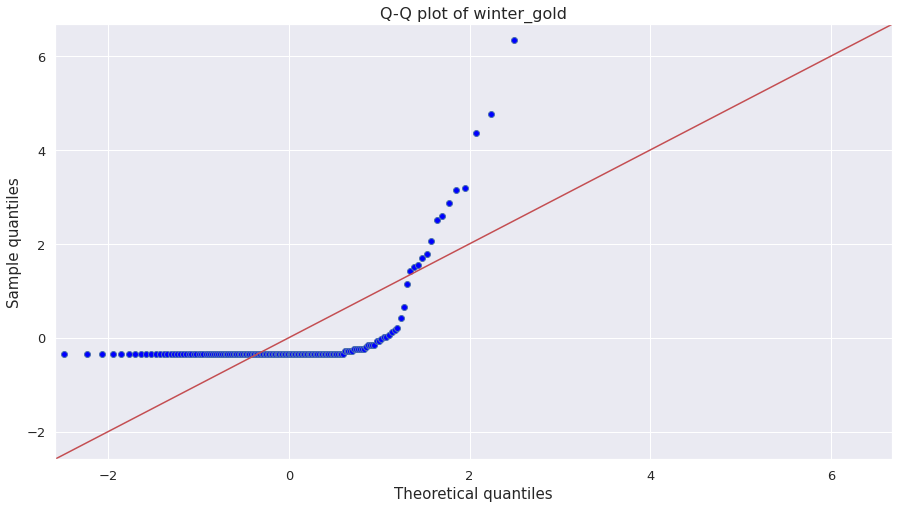

<Figure size 576x360 with 0 Axes>

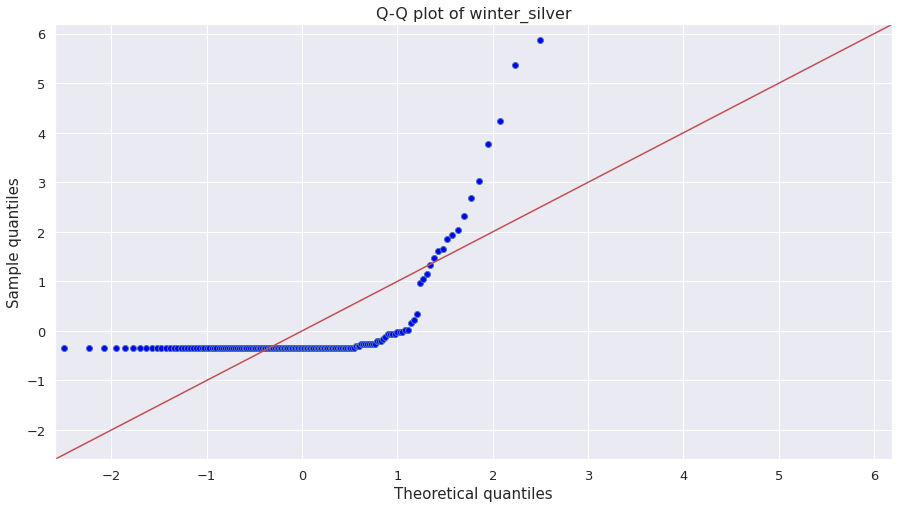

<Figure size 576x360 with 0 Axes>

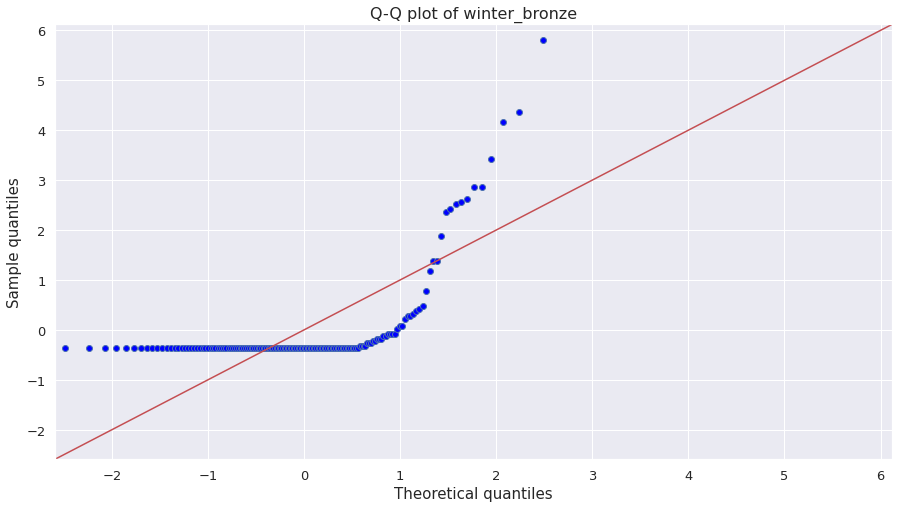

<Figure size 576x360 with 0 Axes>

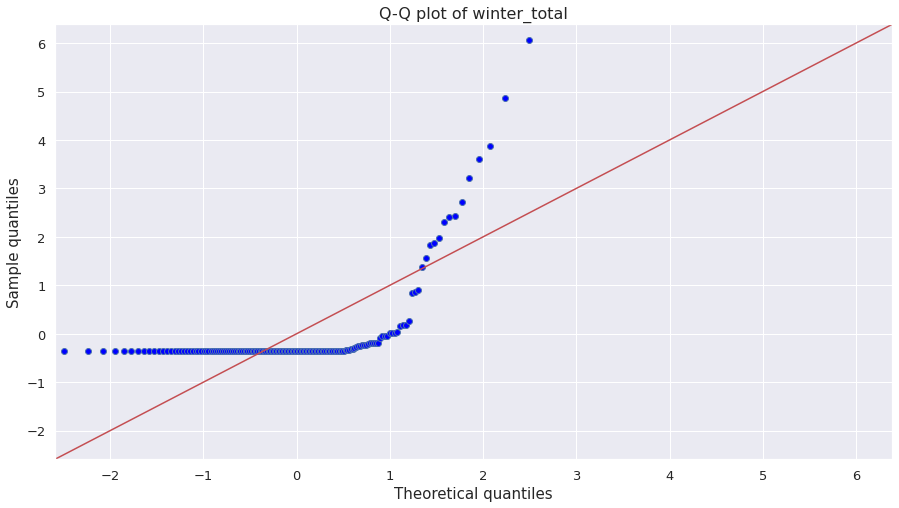

<Figure size 576x360 with 0 Axes>

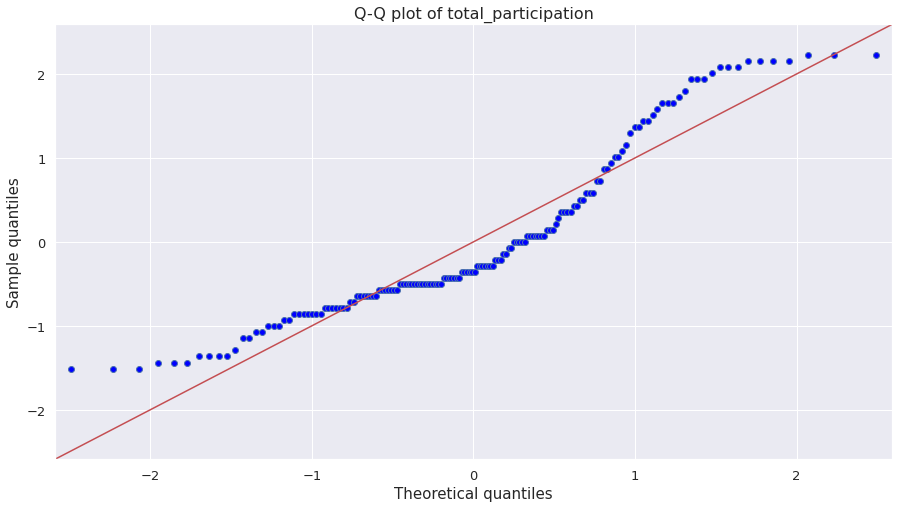

<Figure size 576x360 with 0 Axes>

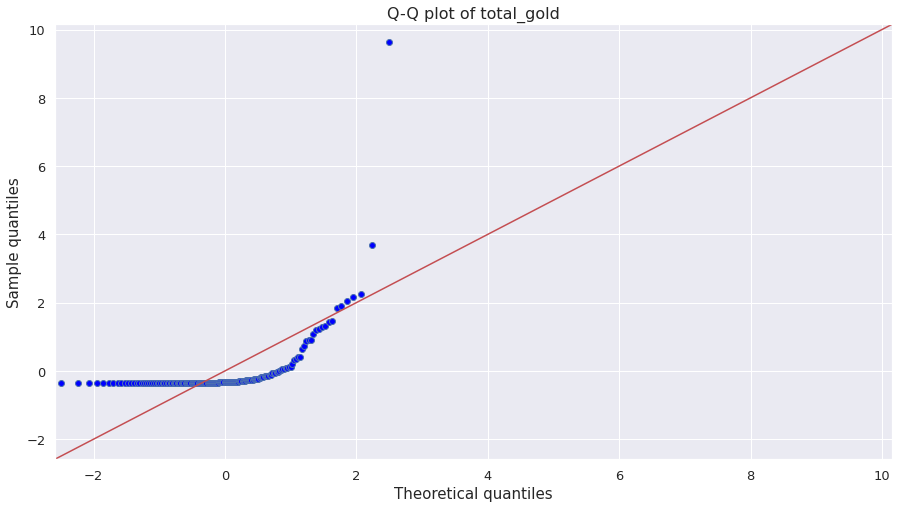

<Figure size 576x360 with 0 Axes>

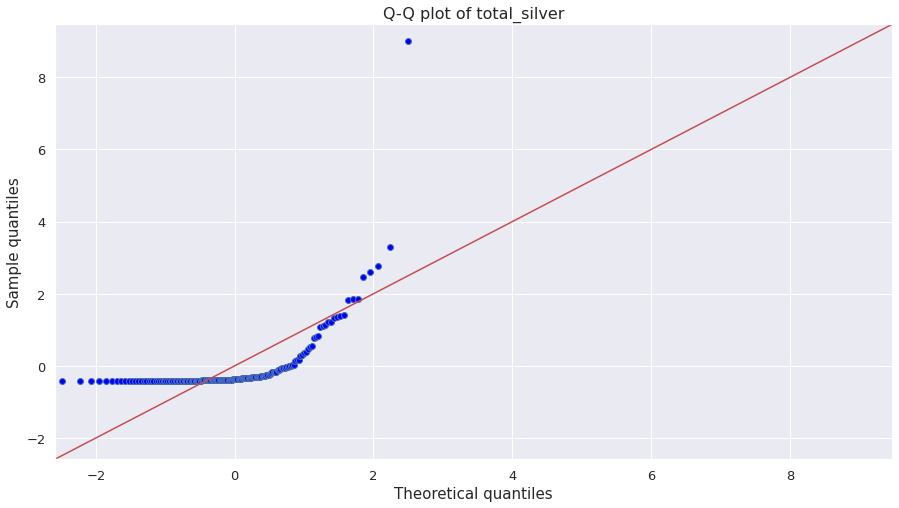

<Figure size 576x360 with 0 Axes>

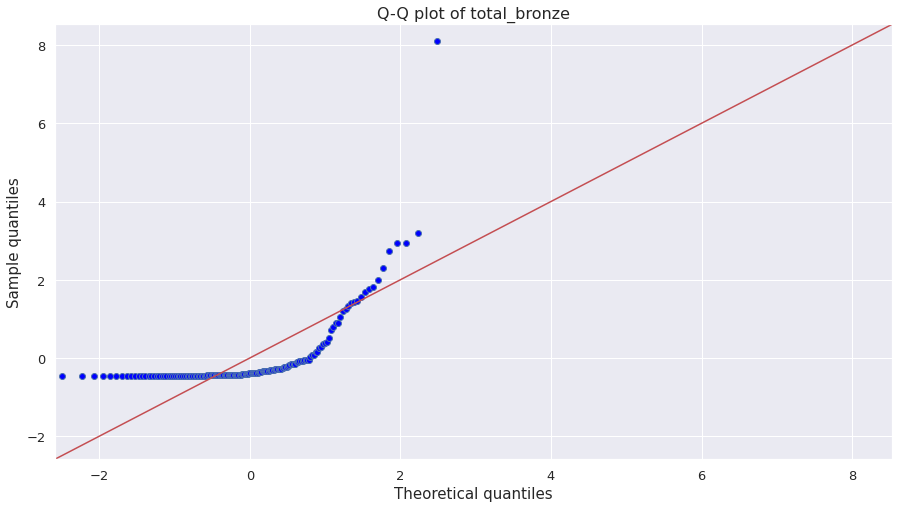

In [60]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm= X
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

Now we will scale the test and train data and fit logistic regression on it.

We have used a Standard Scaler that converts all units to Simple Normal Distribution with mean =0 and SD = 1

In [45]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

## Logistic Regression Algorithm

In [83]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn import metrics
lr_model = lr()
lr_model.fit(X_train_scaled,y_train)
y_predicted = lr_model.predict(X_test_scaled)
print("Accuracy of Logistic Regression Model is = {0: .3f}".format(metrics.accuracy_score(y_test,y_predicted)))

Accuracy of Logistic Regression Model is =  0.094


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Q. Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

>To test this, let us remove the outliers, fit the logistic Regression model and compare the accuracy.



> First we will write a function to calculate the IQR



In [84]:
# Calculating the IQR
def iqr_calculation(main_df,col):
    Q1 = np.percentile(col,25,interpolation = 'midpoint')
    Q3 = np.percentile(col,75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = np.where(col>=(Q3+1.5*IQR))
    lower = np.where(col<=(Q1-1.5*IQR))
    return upper,lower



> Remove the outliers and reset the Dataframe Index



In [153]:
# Remove the outliers
def remove_outliers(main_df,upper,lower):
    main_df.drop(upper[0], inplace = True)
    main_df.drop(lower[0], inplace = True)
    print("New Shape: ", main_df.shape)
    return main_df

# Resetting the dataframe index
def reset_dataframe(main_df):
    main_df.reset_index(inplace=True)
    main_df.drop(columns=[''],inplace=True)
    return main_df

In [154]:
df1 = df.drop(['countries ','ioc_code '],axis = 1)

In [155]:
df1

,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participation,total_gold,total_silver,total_bronze,total_total
0,15,0,0,2,2,0,0,0,0,0,15,0,0,2,2
1,14,5,4,8,17,3,0,0,0,0,17,5,4,8,17
2,25,21,26,30,77,20,0,0,0,0,45,21,26,30,77
3,7,2,8,8,18,8,0,0,0,0,15,2,8,8,18
4,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,14,0,1,1,2,0,0,0,0,0,14,0,1,1,2
152,14,3,4,1,8,1,0,0,0,0,15,3,4,1,8
153,3,1,0,1,2,0,0,0,0,0,3,1,0,1,2
154,1,0,1,2,3,0,0,0,0,0,1,0,1,2,3


In [156]:
df1 = df1.reset_index(drop=True)

In [157]:
import pandas as pd

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

**Q. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

> Create 3 col. for numbers for 1%, 5% and 10% missing data - Column selected - 

In [92]:
df_summer_participations = df[['summer_participations']]
df_summer_participations['summer_participations_copy_1_percent'] = df[['summer_participations']]
df_summer_participations['summer_participations_copy_5_percent'] = df[['summer_participations']]
df_summer_participations['summer_participations_copy_10_percent'] = df[['summer_participations']]
df_summer_participations['Index'] = range(1, len(df_summer_participations) + 1)
# df_MinorAxisLength['sample_num'] = df['sample_num']/1000
df_summer_participations

<ipython-input-92-118f979fabcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer_participations['summer_participations_copy_1_percent'] = df[['summer_participations']]
<ipython-input-92-118f979fabcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer_participations['summer_participations_copy_5_percent'] = df[['summer_participations']]
<ipython-input-92-118f979fabcd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,summer_participations,summer_participations_copy_1_percent,summer_participations_copy_5_percent,summer_participations_copy_10_percent,Index
0,15,15,15,15,1
1,14,14,14,14,2
2,25,25,25,25,3
3,7,7,7,7,4
4,2,2,2,2,5
...,...,...,...,...,...
151,14,14,14,14,152
152,14,14,14,14,153
153,3,3,3,3,154
154,1,1,1,1,155



##Below function checks the % of missing values




In [93]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [95]:
print(get_percent_missing(df_summer_participations))

                                                                 column_name  \
summer_participations                                  summer_participations   
summer_participations_copy_1_percent    summer_participations_copy_1_percent   
summer_participations_copy_5_percent    summer_participations_copy_5_percent   
summer_participations_copy_10_percent  summer_participations_copy_10_percent   
Index                                                                  Index   

                                       percent_missing  
summer_participations                              0.0  
summer_participations_copy_1_percent               0.0  
summer_participations_copy_5_percent               0.0  
summer_participations_copy_10_percent              0.0  
Index                                              0.0  


##Below function creates missing values

In [96]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [97]:
create_missing(df_summer_participations, 0.01, 'summer_participations_copy_1_percent')
create_missing(df_summer_participations, 0.05, 'summer_participations_copy_5_percent')
create_missing(df_summer_participations, 0.1, 'summer_participations_copy_10_percent')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [98]:
print(get_percent_missing(df_summer_participations))

                                                                 column_name  \
summer_participations                                  summer_participations   
summer_participations_copy_1_percent    summer_participations_copy_1_percent   
summer_participations_copy_5_percent    summer_participations_copy_5_percent   
summer_participations_copy_10_percent  summer_participations_copy_10_percent   
Index                                                                  Index   

                                       percent_missing  
summer_participations                         0.000000  
summer_participations_copy_1_percent          1.282051  
summer_participations_copy_5_percent          5.128205  
summer_participations_copy_10_percent        10.256410  
Index                                         0.000000  


In [100]:
# Store Index of NaN values in each coloumns
summer_participations_1_idx = list(np.where(df_summer_participations['summer_participations_copy_1_percent'].isna())[0])
summer_participations_5_idx = list(np.where(df_summer_participations['summer_participations_copy_5_percent'].isna())[0])
summer_participations_10_idx = list(np.where(df_summer_participations['summer_participations_copy_10_percent'].isna())[0])

In [101]:
print(f"Length of number_1_idx is {len(summer_participations_1_idx)} and it contains {(len(summer_participations_1_idx)/len(df_summer_participations['summer_participations_copy_1_percent']))*100} % of total data in column | Total rows: {len(df_summer_participations['summer_participations_copy_1_percent'])}")
print(f"Length of number_5_idx is {len(summer_participations_5_idx)} and it contains {(len(summer_participations_5_idx)/len(df_summer_participations['summer_participations_copy_5_percent']))*100} % of total data in column | Total rows: {len(df_summer_participations['summer_participations_copy_5_percent'])}")
print(f"Length of number_10_idx is {len(summer_participations_10_idx)} and it contains {(len(summer_participations_10_idx)/len(df_summer_participations['summer_participations_copy_10_percent']))*100} % of total data in column | Total rows: {len(df_summer_participations['summer_participations_copy_10_percent'])}")

Length of number_1_idx is 2 and it contains 1.282051282051282 % of total data in column | Total rows: 156
Length of number_5_idx is 8 and it contains 5.128205128205128 % of total data in column | Total rows: 156
Length of number_10_idx is 16 and it contains 10.256410256410255 % of total data in column | Total rows: 156


### Perform KNN impute to df_number dataframe



>  KNN imputer uses the K-nearest neighbour algorithm to impute missing values. It analyses k similar points and uses their average as the value to impute.

More about this [here](https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e)



In [102]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer
df_summer_participations_v2 = df_summer_participations[['Index','summer_participations_copy_1_percent','summer_participations_copy_5_percent','summer_participations_copy_10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_summer_participations_v2), columns = df_summer_participations_v2.columns)

In [103]:
imputed_number_df.sample(10)

,Index,summer_participations_copy_1_percent,summer_participations_copy_5_percent,summer_participations_copy_10_percent
60,61.0,25.0,25.0,25.0
102,103.0,22.0,22.0,20.6
49,50.0,5.0,5.0,5.0
35,36.0,15.0,15.0,15.0
104,105.0,25.0,25.0,25.0
19,20.0,10.0,10.0,10.0
112,113.0,0.0,0.0,0.0
1,2.0,14.0,14.0,14.0
127,128.0,13.0,13.0,13.0
2,3.0,25.0,25.0,23.6


In [104]:
#Check the % missing data in dataframe now
print(get_percent_missing(imputed_number_df))

                                                                 column_name  \
Index                                                                  Index   
summer_participations_copy_1_percent    summer_participations_copy_1_percent   
summer_participations_copy_5_percent    summer_participations_copy_5_percent   
summer_participations_copy_10_percent  summer_participations_copy_10_percent   

                                       percent_missing  
Index                                              0.0  
summer_participations_copy_1_percent               0.0  
summer_participations_copy_5_percent               0.0  
summer_participations_copy_10_percent              0.0  


In [108]:
imputed_number_df['original_summer_participations'] = df_summer_participations['summer_participations']
imputed_number_df['diff_1_percent'] = imputed_number_df['original_summer_participations'] - imputed_number_df['summer_participations_copy_1_percent']
imputed_number_df['diff_5_percent'] = imputed_number_df['original_summer_participations'] - imputed_number_df['summer_participations_copy_5_percent']
imputed_number_df['diff_10_percent'] = imputed_number_df['original_summer_participations'] - imputed_number_df['summer_participations_copy_10_percent']


In [110]:
imputed_number_df

,Index,summer_participations_copy_1_percent,summer_participations_copy_5_percent,summer_participations_copy_10_percent,original_summer_participations,diff_1_percent,diff_5_percent,diff_10_percent
0,1.0,15.0,15.0,15.0,15,0.0,0.0,0.0
1,2.0,14.0,14.0,14.0,14,0.0,0.0,0.0
2,3.0,25.0,25.0,23.6,25,0.0,0.0,1.4
3,4.0,7.0,7.0,7.0,7,0.0,0.0,0.0
4,5.0,2.0,2.0,2.0,2,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
151,152.0,14.0,14.0,14.0,14,0.0,0.0,0.0
152,153.0,14.0,14.0,14.0,14,0.0,0.0,0.0
153,154.0,3.0,3.0,3.0,3,0.0,0.0,0.0
154,155.0,1.0,1.0,1.0,1,0.0,0.0,0.0


In [112]:
for i in summer_participations_10_idx:
    print(str(imputed_number_df['summer_participations_copy_10_percent'][i])+", "+str(imputed_number_df['original_summer_participations'][i])+", "+str(imputed_number_df['diff_10_percent'][i]))

23.6, 25, 1.3999999999999986
8.6, 7, -1.5999999999999996
9.8, 11, 1.1999999999999993
16.2, 16, -0.1999999999999993
15.2, 15, -0.1999999999999993
19.8, 21, 1.1999999999999993
25.2, 28, 2.8000000000000007
14.4, 18, 3.5999999999999996
14.2, 18, 3.8000000000000007
10.0, 10, 0.0
22.2, 24, 1.8000000000000007
20.6, 22, 1.3999999999999986
20.6, 22, 1.3999999999999986
3.4, 3, -0.3999999999999999
17.0, 16, -1.0
19.6, 28, 8.399999999999999


> Calculating the Error , Bias and Variance for 1% , 5% and 10% imputated data

In [113]:
imputed_number_df['diff_1_percent'] = imputed_number_df['diff_1_percent'].astype(float)
imputed_number_df['diff_5_percent'] = imputed_number_df['diff_5_percent'].astype(float)
imputed_number_df['diff_10_percent'] = imputed_number_df['diff_10_percent'].astype(float)

print("Error for 1% Imputation =",imputed_number_df['diff_1_percent'].sum(axis=0))
print("Error for 5% Imputation =",imputed_number_df['diff_5_percent'].sum(axis=0))
print("Error for 10% Imputation =",imputed_number_df['diff_10_percent'].sum(axis=0))

Error for 1% Imputation = 1.1999999999999993
Error for 5% Imputation = 12.399999999999997
Error for 10% Imputation = 23.599999999999994


In [114]:
from math import sqrt
variance_1_percent = (imputed_number_df['diff_1_percent'] ** 2)/(len(imputed_number_df)-1)
variance_5_percent = (imputed_number_df['diff_5_percent'] ** 2)/(len(imputed_number_df)-1)
variance_10_percent = (imputed_number_df['diff_10_percent'] ** 2)/(len(imputed_number_df)-1)
print("Variance for 1 percent missing data is  ",variance_1_percent.sum(axis=0))
print("Variance for 5 percent missing data is  ",variance_5_percent.sum(axis=0))
print("Variance for 10 percent missing data is  ",variance_10_percent.sum(axis=0))


Variance for 1 percent missing data is   0.10580645161290314
Variance for 5 percent missing data is   0.8861935483870964
Variance for 10 percent missing data is   0.7845161290322579


In [115]:
acutual = imputed_number_df['original_summer_participations'].sum(axis=0) 
predicted_1_percent = imputed_number_df['summer_participations_copy_1_percent'].sum(axis=0) 
predicted_5_percent = imputed_number_df['summer_participations_copy_5_percent'].sum(axis=0) 
predicted_10_percent = imputed_number_df['summer_participations_copy_10_percent'].sum(axis=0) 
N = len(summer_participations_10_idx) - 1

bias_1_percent = (acutual - predicted_1_percent) / N
bias_5_percent = (acutual - predicted_5_percent) / N
bias_10_percent = (acutual - predicted_10_percent) / N
print("Bias for 1 percent missing data is = ",bias_1_percent)
print("Bias for 5 percent missing data is = ",bias_5_percent)
print("Bias for 10 percent missing data is = ",bias_10_percent)

Bias for 1 percent missing data is =  0.07999999999998787
Bias for 5 percent missing data is =  0.8266666666666728
Bias for 10 percent missing data is =  1.5733333333333273


### Imputation Method - Mean Imputation

> The missing values are imputed by mean of the feature.

In [116]:
from sklearn.impute import SimpleImputer

In [117]:
df_summer_participations = df[['summer_participations']]
df_summer_participations['summer_participations_copy_1_percent'] = df[['summer_participations']]
df_summer_participations['summer_participations_copy_5_percent'] = df[['summer_participations']]
df_summer_participations['summer_participations_copy_10_percent'] = df[['summer_participations']]
df_summer_participations['Index'] = range(1, len(df_summer_participations) + 1)
# df_summer_participations['sample_num'] = df['sample_num']/1000
df_summer_participations

<ipython-input-117-f17086d70b17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer_participations['summer_participations_copy_1_percent'] = df[['summer_participations']]
<ipython-input-117-f17086d70b17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer_participations['summer_participations_copy_5_percent'] = df[['summer_participations']]
<ipython-input-117-f17086d70b17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,summer_participations,summer_participations_copy_1_percent,summer_participations_copy_5_percent,summer_participations_copy_10_percent,Index
0,15,15,15,15,1
1,14,14,14,14,2
2,25,25,25,25,3
3,7,7,7,7,4
4,2,2,2,2,5
...,...,...,...,...,...
151,14,14,14,14,152
152,14,14,14,14,153
153,3,3,3,3,154
154,1,1,1,1,155


In [118]:
print(get_percent_missing(df_summer_participations))

                                                                 column_name  \
summer_participations                                  summer_participations   
summer_participations_copy_1_percent    summer_participations_copy_1_percent   
summer_participations_copy_5_percent    summer_participations_copy_5_percent   
summer_participations_copy_10_percent  summer_participations_copy_10_percent   
Index                                                                  Index   

                                       percent_missing  
summer_participations                              0.0  
summer_participations_copy_1_percent               0.0  
summer_participations_copy_5_percent               0.0  
summer_participations_copy_10_percent              0.0  
Index                                              0.0  


In [119]:
create_missing(df_summer_participations, 0.01, 'summer_participations_copy_1_percent')
create_missing(df_summer_participations, 0.05, 'summer_participations_copy_5_percent')
create_missing(df_summer_participations, 0.1, 'summer_participations_copy_10_percent')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [120]:
print(get_percent_missing(df_summer_participations))

                                                                 column_name  \
summer_participations                                  summer_participations   
summer_participations_copy_1_percent    summer_participations_copy_1_percent   
summer_participations_copy_5_percent    summer_participations_copy_5_percent   
summer_participations_copy_10_percent  summer_participations_copy_10_percent   
Index                                                                  Index   

                                       percent_missing  
summer_participations                         0.000000  
summer_participations_copy_1_percent          1.282051  
summer_participations_copy_5_percent          5.128205  
summer_participations_copy_10_percent        10.256410  
Index                                         0.000000  


In [121]:
# Store Index of NaN values in each coloumns
summer_participations_1_idx = list(np.where(df_summer_participations['summer_participations_copy_1_percent'].isna())[0])
summer_participations_5_idx = list(np.where(df_summer_participations['summer_participations_copy_5_percent'].isna())[0])
summer_participations_10_idx = list(np.where(df_summer_participations['summer_participations_copy_10_percent'].isna())[0])

In [123]:
print(f"Length of number_1_idx is {len(summer_participations_1_idx)} and it contains {(len(summer_participations_1_idx)/len(df_summer_participations['summer_participations_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_summer_participations['summer_participations_copy_1_percent'])}")
print(f"Length of number_5_idx is {len(summer_participations_5_idx)} and it contains {(len(summer_participations_5_idx)/len(df_summer_participations['summer_participations_copy_5_percent']))*100}% of total data in column | Total rows: {len(df_summer_participations['summer_participations_copy_5_percent'])}")
print(f"Length of number_10_idx is {len(summer_participations_10_idx)} and it contains {(len(summer_participations_10_idx)/len(df_summer_participations['summer_participations_copy_10_percent']))*100}% of total data in column | Total rows: {len(df_summer_participations['summer_participations_copy_10_percent'])}")

Length of number_1_idx is 2 and it contains 1.282051282051282% of total data in column | Total rows: 156
Length of number_5_idx is 8 and it contains 5.128205128205128% of total data in column | Total rows: 156
Length of number_10_idx is 16 and it contains 10.256410256410255% of total data in column | Total rows: 156


In [124]:
df_summer_participations_v2 = df_summer_participations[['Index','summer_participations_copy_1_percent','summer_participations_copy_5_percent','summer_participations_copy_10_percent']]
imputer = SimpleImputer(strategy='most_frequent')
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_summer_participations_v2), columns = df_summer_participations_v2.columns)

In [125]:
imputed_number_df.sample(10)

,Index,summer_participations_copy_1_percent,summer_participations_copy_5_percent,summer_participations_copy_10_percent
125,126.0,18.0,18.0,18.0
89,90.0,11.0,11.0,11.0
41,42.0,15.0,15.0,7.0
63,64.0,15.0,15.0,15.0
85,86.0,7.0,7.0,7.0
28,29.0,8.0,8.0,8.0
114,115.0,15.0,15.0,15.0
16,17.0,23.0,23.0,23.0
11,12.0,7.0,7.0,7.0
147,148.0,19.0,19.0,19.0


In [126]:
print(get_percent_missing(imputed_number_df))

                                                                 column_name  \
Index                                                                  Index   
summer_participations_copy_1_percent    summer_participations_copy_1_percent   
summer_participations_copy_5_percent    summer_participations_copy_5_percent   
summer_participations_copy_10_percent  summer_participations_copy_10_percent   

                                       percent_missing  
Index                                              0.0  
summer_participations_copy_1_percent               0.0  
summer_participations_copy_5_percent               0.0  
summer_participations_copy_10_percent              0.0  


In [128]:
imputed_number_df['original_summer_participations'] = df_summer_participations['summer_participations']
imputed_number_df['diff_1_percent'] = imputed_number_df['original_summer_participations'] - imputed_number_df['summer_participations_copy_1_percent']
imputed_number_df['diff_5_percent'] = imputed_number_df['original_summer_participations'] - imputed_number_df['summer_participations_copy_5_percent']
imputed_number_df['diff_10_percent'] = imputed_number_df['original_summer_participations'] - imputed_number_df['summer_participations_copy_10_percent']
print("Difference for 1 percent missing data .. first 3 rows only ",imputed_number_df['diff_1_percent'].head(3).sum(axis=0))
print("Difference for 5 percent missing data .. first 3 rows only ",imputed_number_df['diff_5_percent'].head(3).sum(axis=0))
print("Difference for 10 percent missing data .. first 3 rows only ",imputed_number_df['diff_10_percent'].head(3).sum(axis=0))

Difference for 1 percent missing data .. first 3 rows only  0.0
Difference for 5 percent missing data .. first 3 rows only  0.0
Difference for 10 percent missing data .. first 3 rows only  0.0


In [129]:
for i in summer_participations_10_idx:
    print(str(imputed_number_df['summer_participations_copy_10_percent'][i])+", "+str(imputed_number_df['original_summer_participations'][i])+", "+str(imputed_number_df['diff_10_percent'][i]))

7.0, 2, -5.0
7.0, 27, 20.0
7.0, 11, 4.0
7.0, 20, 13.0
7.0, 23, 16.0
7.0, 6, -1.0
7.0, 15, 8.0
7.0, 18, 11.0
7.0, 13, 6.0
7.0, 27, 20.0
7.0, 6, -1.0
7.0, 3, -4.0
7.0, 1, -6.0
7.0, 17, 10.0
7.0, 18, 11.0
7.0, 14, 7.0


In [130]:
imputed_number_df['diff_1_percent'] = imputed_number_df['diff_1_percent'].astype(float)
imputed_number_df['diff_5_percent'] = imputed_number_df['diff_5_percent'].astype(float)
imputed_number_df['diff_10_percent'] = imputed_number_df['diff_10_percent'].astype(float)

print("Error for 1% imputation: ",imputed_number_df['diff_1_percent'].sum(axis=0))
print("Error for 5% imputation: ",imputed_number_df['diff_5_percent'].sum(axis=0))
print("Error for 10% imputation: ",imputed_number_df['diff_10_percent'].sum(axis=0))

Error for 1% imputation:  2.0
Error for 5% imputation:  62.0
Error for 10% imputation:  109.0


In [131]:
from math import sqrt
variance_1_percent = (imputed_number_df['diff_1_percent'] ** 2)/(len(imputed_number_df)-1)
variance_5_percent = (imputed_number_df['diff_5_percent'] ** 2)/(len(imputed_number_df)-1)
variance_10_percent = (imputed_number_df['diff_10_percent'] ** 2)/(len(imputed_number_df)-1)
print("Variance for 1 percent missing data is  ",variance_1_percent.sum(axis=0))
print("Variance for 5 percent missing data is  ",variance_5_percent.sum(axis=0))
print("Variance for 10 percent missing data is  ",variance_10_percent.sum(axis=0))

Variance for 1 percent missing data is   0.4774193548387097
Variance for 5 percent missing data is   6.6967741935483875
Variance for 10 percent missing data is   11.683870967741935


In [132]:
acutual = imputed_number_df['original_summer_participations'].sum(axis=0) 
predicted_1_percent = imputed_number_df['summer_participations_copy_1_percent'].sum(axis=0) 
predicted_5_percent = imputed_number_df['summer_participations_copy_5_percent'].sum(axis=0) 
predicted_10_percent = imputed_number_df['summer_participations_copy_10_percent'].sum(axis=0) 
N = len(summer_participations_10_idx) - 1

SimpleImputer_bias_1_percent = (acutual - predicted_1_percent) / N
SimpleImputer_bias_5_percent = (acutual - predicted_5_percent) / N
SimpleImputer_bias_10_percent = (acutual - predicted_10_percent) / N
print("Bias for 1 percent missing data is = ",SimpleImputer_bias_1_percent)
print("Bias for 5 percent missing data is = ",SimpleImputer_bias_5_percent)
print("Bias for 10 percent missing data is = ",SimpleImputer_bias_10_percent)

Bias for 1 percent missing data is =  0.13333333333333333
Bias for 5 percent missing data is =  4.133333333333334
Bias for 10 percent missing data is =  7.266666666666667


### Imputation Method - Iterative Imputer



> Multivariate imputer that estimates each feature from all the others.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

More on this [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)



In [133]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [134]:
df_summer_participations = df[['summer_participations']]
df_summer_participations['summer_participations_copy_1_percent'] = df[['summer_participations']]
df_summer_participations['summer_participations_copy_5_percent'] = df[['summer_participations']]
df_summer_participations['summer_participations_copy_10_percent'] = df[['summer_participations']]
df_summer_participations['Index'] = range(1, len(df_summer_participations) + 1)
# df_MinorAxisLength['sample_num'] = df['sample_num']/1000
df_summer_participations

<ipython-input-134-118f979fabcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer_participations['summer_participations_copy_1_percent'] = df[['summer_participations']]
<ipython-input-134-118f979fabcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer_participations['summer_participations_copy_5_percent'] = df[['summer_participations']]
<ipython-input-134-118f979fabcd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,summer_participations,summer_participations_copy_1_percent,summer_participations_copy_5_percent,summer_participations_copy_10_percent,Index
0,15,15,15,15,1
1,14,14,14,14,2
2,25,25,25,25,3
3,7,7,7,7,4
4,2,2,2,2,5
...,...,...,...,...,...
151,14,14,14,14,152
152,14,14,14,14,153
153,3,3,3,3,154
154,1,1,1,1,155


In [135]:
print(get_percent_missing(df_summer_participations))

                                                                 column_name  \
summer_participations                                  summer_participations   
summer_participations_copy_1_percent    summer_participations_copy_1_percent   
summer_participations_copy_5_percent    summer_participations_copy_5_percent   
summer_participations_copy_10_percent  summer_participations_copy_10_percent   
Index                                                                  Index   

                                       percent_missing  
summer_participations                              0.0  
summer_participations_copy_1_percent               0.0  
summer_participations_copy_5_percent               0.0  
summer_participations_copy_10_percent              0.0  
Index                                              0.0  


In [136]:
create_missing(df_summer_participations, 0.01, 'summer_participations_copy_1_percent')
create_missing(df_summer_participations, 0.05, 'summer_participations_copy_5_percent')
create_missing(df_summer_participations, 0.1, 'summer_participations_copy_10_percent')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [137]:
print(get_percent_missing(df_summer_participations))

                                                                 column_name  \
summer_participations                                  summer_participations   
summer_participations_copy_1_percent    summer_participations_copy_1_percent   
summer_participations_copy_5_percent    summer_participations_copy_5_percent   
summer_participations_copy_10_percent  summer_participations_copy_10_percent   
Index                                                                  Index   

                                       percent_missing  
summer_participations                         0.000000  
summer_participations_copy_1_percent          1.282051  
summer_participations_copy_5_percent          5.128205  
summer_participations_copy_10_percent        10.256410  
Index                                         0.000000  


In [138]:
# Store Index of NaN values in each coloumns
summer_participations_1_idx = list(np.where(df_summer_participations['summer_participations_copy_1_percent'].isna())[0])
summer_participations_5_idx = list(np.where(df_summer_participations['summer_participations_copy_5_percent'].isna())[0])
summer_participations_10_idx = list(np.where(df_summer_participations['summer_participations_copy_10_percent'].isna())[0])

In [139]:
print(f"Length of number_1_idx is {len(summer_participations_1_idx)} and it contains {(len(summer_participations_1_idx)/len(df_summer_participations['summer_participations_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_summer_participations['summer_participations_copy_1_percent'])}")
print(f"Length of number_5_idx is {len(summer_participations_5_idx)} and it contains {(len(summer_participations_5_idx)/len(df_summer_participations['summer_participations_copy_5_percent']))*100}% of total data in column | Total rows: {len(df_summer_participations['summer_participations_copy_5_percent'])}")
print(f"Length of number_10_idx is {len(summer_participations_10_idx)} and it contains {(len(summer_participations_10_idx)/len(df_summer_participations['summer_participations_copy_10_percent']))*100}% of total data in column | Total rows: {len(df_summer_participations['summer_participations_copy_10_percent'])}")

Length of number_1_idx is 2 and it contains 1.282051282051282% of total data in column | Total rows: 156
Length of number_5_idx is 8 and it contains 5.128205128205128% of total data in column | Total rows: 156
Length of number_10_idx is 16 and it contains 10.256410256410255% of total data in column | Total rows: 156


In [140]:
df_summer_participations_v2 = df_summer_participations[['Index','summer_participations_copy_1_percent','summer_participations_copy_5_percent','summer_participations_copy_10_percent']]
imputer = IterativeImputer()
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_summer_participations_v2), columns = df_summer_participations_v2.columns)

In [141]:
imputed_number_df.sample(10)

,Index,summer_participations_copy_1_percent,summer_participations_copy_5_percent,summer_participations_copy_10_percent
87,88.0,4.0,4.0,4.0
110,111.0,9.0,9.0,9.0
85,86.0,7.0,7.0,7.0
134,135.0,17.0,17.0,17.0
142,143.0,7.0,7.0,7.0
27,28.0,14.0,14.0,14.0
70,71.0,7.0,7.0,7.0
147,148.0,19.0,19.0,19.0
122,123.0,8.0,8.0,8.0
68,69.0,23.0,23.0,23.0


In [142]:
print(get_percent_missing(imputed_number_df))

                                                                 column_name  \
Index                                                                  Index   
summer_participations_copy_1_percent    summer_participations_copy_1_percent   
summer_participations_copy_5_percent    summer_participations_copy_5_percent   
summer_participations_copy_10_percent  summer_participations_copy_10_percent   

                                       percent_missing  
Index                                              0.0  
summer_participations_copy_1_percent               0.0  
summer_participations_copy_5_percent               0.0  
summer_participations_copy_10_percent              0.0  


In [143]:
imputed_number_df['original_summer_participations'] = df_summer_participations['summer_participations']
imputed_number_df['diff_1_percent'] = imputed_number_df['original_summer_participations'] - imputed_number_df['summer_participations_copy_1_percent']
imputed_number_df['diff_5_percent'] = imputed_number_df['original_summer_participations'] - imputed_number_df['summer_participations_copy_5_percent']
imputed_number_df['diff_10_percent'] = imputed_number_df['original_summer_participations'] - imputed_number_df['summer_participations_copy_10_percent']
print("Difference for 1 percent missing data .. first 3 rows only ",imputed_number_df['diff_1_percent'].head(3).sum(axis=0))
print("Difference for 5 percent missing data .. first 3 rows only ",imputed_number_df['diff_5_percent'].head(3).sum(axis=0))
print("Difference for 10 percent missing data .. first 3 rows only ",imputed_number_df['diff_10_percent'].head(3).sum(axis=0))

Difference for 1 percent missing data .. first 3 rows only  0.0
Difference for 5 percent missing data .. first 3 rows only  0.0
Difference for 10 percent missing data .. first 3 rows only  0.0


In [144]:
for i in summer_participations_10_idx:
    print(str(imputed_number_df['summer_participations_copy_10_percent'][i])+", "+str(imputed_number_df['original_summer_participations'][i])+", "+str(imputed_number_df['diff_10_percent'][i]))

28.000000002916067, 28, -2.916067387559451e-09
18.999999999121627, 19, 8.783729299466358e-10
21.0000000027486, 21, -2.748599570168153e-09
26.00002015223238, 26, -2.0152232380610258e-05
25.0000326191372, 25, -3.261913720109533e-05
15.000000008834556, 15, -8.834556197712118e-09
7.000000005743619, 7, -5.743618913811588e-09
25.00000001682102, 25, -1.6821019244162017e-08
3.0000000056252714, 3, -5.625271359832595e-09
1.0000000051696754, 1, -5.169675354466108e-09
15.000000013433056, 15, -1.3433055556788531e-08
11.000000014107552, 11, -1.4107552459563522e-08
16.00000001889363, 16, -1.8893629771810083e-08
16.000000019210766, 16, -1.921076631106189e-08
3.0000000126023068, 3, -1.2602306753706216e-08
3.0000000129194446, 3, -1.2919444625225651e-08


In [145]:
imputed_number_df['diff_1_percent'] = imputed_number_df['diff_1_percent'].astype(float)
imputed_number_df['diff_5_percent'] = imputed_number_df['diff_5_percent'].astype(float)
imputed_number_df['diff_10_percent'] = imputed_number_df['diff_10_percent'].astype(float)

In [146]:
print('Error for 1% imputed values:',imputed_number_df['diff_1_percent'].sum(axis=0))
print('Error for 5% imputed values:',imputed_number_df['diff_5_percent'].sum(axis=0))
print('Error for 10% imputed values:',imputed_number_df['diff_10_percent'].sum(axis=0))

Error for 1% imputed values: 1.9072625097038554e-06
Error for 5% imputed values: -0.00010553801425094989
Error for 10% imputed values: -5.2909516772281506e-05


In [147]:
variance_1_percent = (imputed_number_df['diff_1_percent'] ** 2)/(len(imputed_number_df)-1)
variance_5_percent = (imputed_number_df['diff_5_percent'] ** 2)/(len(imputed_number_df)-1)
variance_10_percent = (imputed_number_df['diff_10_percent'] ** 2)/(len(imputed_number_df)-1)
print("Variance for 1 percent missing data is  ",variance_1_percent.sum(axis=0))
print("Variance for 5 percent missing data is  ",variance_5_percent.sum(axis=0))
print("Variance for 10 percent missing data is  ",variance_10_percent.sum(axis=0))

Variance for 1 percent missing data is   3.170792806136124e-14
Variance for 5 percent missing data is   3.7903697221678156e-11
Variance for 10 percent missing data is   9.484661174665985e-12


In [148]:
acutual = imputed_number_df['original_summer_participations'].sum(axis=0) 
predicted_1_percent = imputed_number_df['summer_participations_copy_1_percent'].sum(axis=0) 
predicted_5_percent = imputed_number_df['summer_participations_copy_5_percent'].sum(axis=0) 
predicted_10_percent = imputed_number_df['summer_participations_copy_10_percent'].sum(axis=0) 
N = len(summer_participations_10_idx) - 1

SimpleImputer_bias_1_percent = (acutual - predicted_1_percent) / N
SimpleImputer_bias_5_percent = (acutual - predicted_5_percent) / N
SimpleImputer_bias_10_percent = (acutual - predicted_10_percent) / N
print("Bias for 1 percent missing data is = ",SimpleImputer_bias_1_percent)
print("Bias for 5 percent missing data is = ",SimpleImputer_bias_5_percent)
print("Bias for 10 percent missing data is = ",SimpleImputer_bias_10_percent)

Bias for 1 percent missing data is =  1.2715084570421217e-07
Bias for 5 percent missing data is =  -7.035867626351925e-06
Bias for 10 percent missing data is =  -3.527301123540383e-06


Copyright (c) 2023 Hemanth Saragadam

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

End of the assignment 